In [0]:
from google.colab import files
files.upload()

Saving ratings_Electronics_1.csv to ratings_Electronics_1.csv


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
Colname=['uid','pid','rating','timestamp']

In [0]:
df=pd.read_csv("ratings_Electronics_1.csv",names=Colname)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
uid          object
pid          object
rating       float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [0]:
df.shape

(7824482, 4)

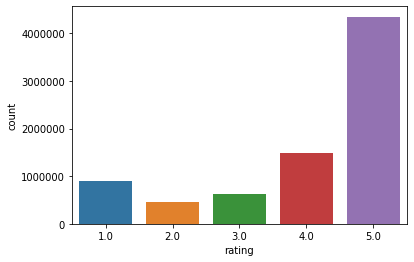

In [0]:
sns.countplot(x='rating',data=df)

In [0]:
#Drop timestamp column

In [0]:
df=df.drop('timestamp',axis=1)

In [0]:
#subset of data

In [0]:
df1=pd.DataFrame(df.groupby('uid')['rating'].count()) 

In [0]:
df1=df1[df1['rating']>=50]

In [0]:
df1=df1.rename(columns={"uid":"uid","rating":"rating_count"})

In [0]:
#merge two dataset

In [0]:
df=pd.merge(df,df1,left_on='uid',right_on='uid',how='inner')

In [0]:
df.shape

(125871, 4)

In [0]:
df.head()

,uid,pid,rating,rating_count
0,A3BY5KCNQZXV5U,0594451647,5.0,50
1,A3BY5KCNQZXV5U,B00000JD4V,4.0,50
2,A3BY5KCNQZXV5U,B000063574,5.0,50
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0,50
4,A3BY5KCNQZXV5U,B0007Y794O,5.0,50


In [0]:
#Popularity based model

In [0]:
rating_mean = pd.DataFrame(df.groupby('pid')['rating'].mean()) 

In [0]:
rating_mean.shape

(48190, 1)

In [0]:
rating_mean['count_of rating']=pd.DataFrame(df.groupby('pid')['rating'].count())

In [0]:
rating_mean.head()

,rating,count_of rating
pid,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


In [0]:
rating_mean=rating_mean[rating_mean['count_of rating']>=70] # taking threshold as 70 (minimum count of rating for a product)

In [0]:
rating_mean.head()

,rating,count_of rating
pid,,
B00004ZCJE,4.250000,72
B000LRMS66,4.450704,71
B000N99BBC,4.772455,167
B000QUUFRW,4.809524,84
B000VX6XL6,4.742857,70


In [0]:
rating_mean.sort_values(by='rating',ascending=False).head(10)# We can recommned these ten product bsed on popularity based model

,rating,count_of rating
pid,,
B001TH7GUU,4.871795,78
B003ES5ZUU,4.864130,184
B0019EHU8G,4.855556,90
B000QUUFRW,4.809524,84
B000N99BBC,4.772455,167
B002WE6D44,4.770000,100
B000VX6XL6,4.742857,70
B007WTAJTO,4.701220,164
B002V88HFE,4.698113,106


In [0]:
df.head()

,uid,pid,rating,rating_count
0,A3BY5KCNQZXV5U,0594451647,5.0,50
1,A3BY5KCNQZXV5U,B00000JD4V,4.0,50
2,A3BY5KCNQZXV5U,B000063574,5.0,50
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0,50
4,A3BY5KCNQZXV5U,B0007Y794O,5.0,50


In [0]:
df=df.drop('rating_count',axis=1)

In [0]:
df.head()

,uid,pid,rating
0,A3BY5KCNQZXV5U,0594451647,5.0
1,A3BY5KCNQZXV5U,B00000JD4V,4.0
2,A3BY5KCNQZXV5U,B000063574,5.0
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0
4,A3BY5KCNQZXV5U,B0007Y794O,5.0


In [0]:
#Collabrative Filtering

In [0]:
!pip install surprise

     |████████████████████████████████| 6.5MB 4.2MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678200 sha256=e68343d54ea9f44f2b4a80858509973ef82844af8655f024ea2d9365c1f3e599
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
from surprise import accuracy
from surprise.model_selection import train_test_split

In [0]:
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(df[['uid', 'pid', 'rating']], reader)
train_set, test_set = train_test_split(data, test_size=.30)

In [0]:
from surprise import SVD

In [0]:
algo = SVD()
algo.fit(train_set)

In [0]:
predict = algo.test(test_set)

In [0]:
accuracy.rmse(predict, verbose=True)

RMSE: 0.9917


0.9917180802300399

In [0]:
def get_Iu(uid):
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: 
        return 0
    
def get_Ui(iid):
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df_2 = pd.DataFrame(predict, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_2['Iu'] = df_2.uid.apply(get_Iu)
df_2['Ui'] = df_2.iid.apply(get_Ui)
df_2['err'] = abs(df_2.est - df_2.rui)
df_2.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,A3FEJ8H2VTN0OJ,B002BH3Z8E,5.0,4.847369,{'was_impossible': False},39,22,0.152631
1,A3N0P5AAMP6XD2,B004O6A9BG,4.0,3.715670,{'was_impossible': False},73,1,0.284330
2,AYB4ELCS5AM8P,B00IF0JAIU,5.0,5.000000,{'was_impossible': False},110,4,0.000000
3,A2DS9DLMSU2M2Z,B004U8ZHY2,5.0,4.523394,{'was_impossible': False},43,1,0.476606
4,A3IMALU0RM8UT9,B009SYZ8OC,5.0,4.605081,{'was_impossible': False},48,68,0.394919


In [0]:
best_predict = df_2.sort_values(by='err')[:10]
worst_predict = df_2.sort_values(by='err')[-10:]

In [0]:
best_predict

,uid,iid,rui,est,details,Iu,Ui,err
8732,A2NX6PABLIJLP1,B003ES5ZUU,5.0,5.0,{'was_impossible': False},48,124,0.0
31374,ABDR6IJ93HFIO,B000S5Q9CA,5.0,5.0,{'was_impossible': False},145,28,0.0
17920,AYB4ELCS5AM8P,B002K23V1Q,5.0,5.0,{'was_impossible': False},110,3,0.0
8328,A38C12950IM24P,B00G4UQ6U8,5.0,5.0,{'was_impossible': False},60,39,0.0
12204,A18U49406IPPIJ,B00GTLN1BO,5.0,5.0,{'was_impossible': False},64,7,0.0
28013,A5QDZEOIMQ4LW,B00009XVCZ,5.0,5.0,{'was_impossible': False},41,25,0.0
3317,A34BZM6S9L7QI4,B003ZTKFEE,5.0,5.0,{'was_impossible': False},125,7,0.0
23217,A2KYRPDKVBI2R4,B0034CL2ZI,5.0,5.0,{'was_impossible': False},116,73,0.0
609,A1VLE2SH9J8WYS,B003ES5ZUU,5.0,5.0,{'was_impossible': False},35,124,0.0
35793,A2SKEQT0WTB954,B00C20KWP4,5.0,5.0,{'was_impossible': False},101,8,0.0
